theta0= [0. 0.]
theta1= [0.05235988 0.05235988]
theta2= [-1.51843645 -1.51843645]
theta3= [0.00349066 0.00349066]


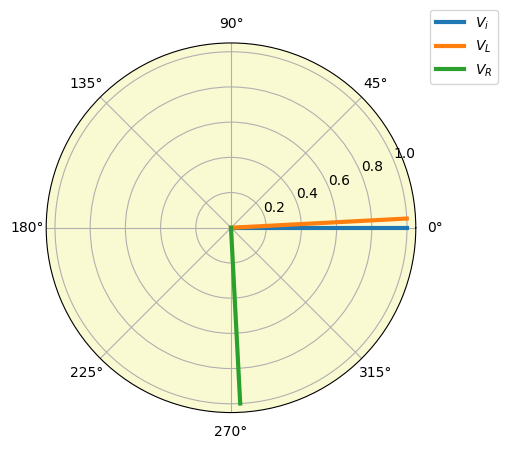

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(projection="polar", facecolor="lightgoldenrodyellow")
theta0 = np.deg2rad([0, 0])
print("theta0= %s" %theta0)
R0 = [0,1]

theta1 = np.deg2rad([90-87, 90-87])
print("theta1= %s" %theta1)
R1 = [0,1]


theta2 = np.deg2rad([-87, -87])
print("theta2= %s" %theta2)
R1 = [0,1]

#for midday
theta3 = np.deg2rad([0.2, 0.2])
print("theta3= %s" %theta3)
R3 = [0,1]

ax.set_theta_zero_location("E")
ax.set_theta_direction(1)

ax.plot(theta0,R1, lw=3, label=r'$V_{i}$')
ax.plot( theta1, R1, lw=3, label=r'$V_{L}$')
ax.plot( theta2, R0, lw=3, label=r'$V_{R}$')


ax.legend(loc="lower left",
          bbox_to_anchor=(.75 + np.cos(1)/2, .45 + np.sin(1)/2))

plt.show()

Text(0, 0.5, '$k_2$')

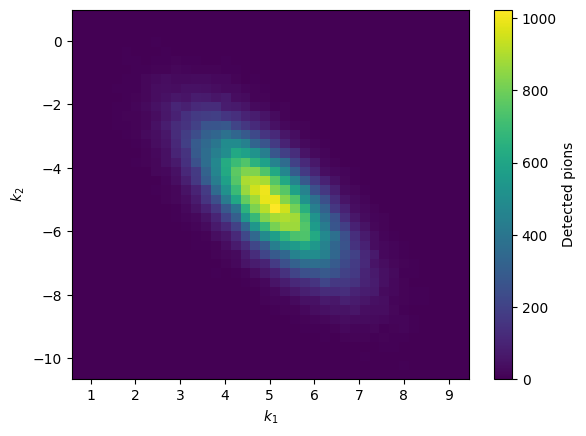

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as ticker

ax=plt.gca()
x=np.random.randn(100000)+5
y=-x+np.random.randn(100000)
counts ,xedges, yedges,im=ax.hist2d(x,y,bins=40,density=False)
cb=plt.colorbar(im,ax=ax)
cb.set_label("Detected pions")
ax.set_xlabel(r'$k_1$')
ax.set_ylabel(r'$k_2$')

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
!pwd

/content


In [9]:
cd '/content/drive/My Drive/matplotlib data'

/content/drive/My Drive/matplotlib data


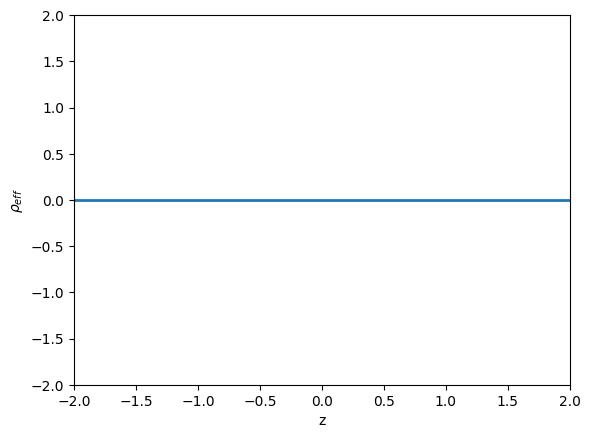

In [ ]:
#Animation
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation

fig=plt.figure()
ax=plt.axes(xlim=(-2,2),ylim=(-2,2))
line, =ax.plot([],[],lw=2)
ax.set_xlabel('z')
ax.set_ylabel(r'$\rho_{eff}$')

def init():
  line.set_data([],[])
  return line,

def animate(i):
  x=np.linspace(-2,2,1000)
  y=np.exp(-x*x-0.01*i*i)#np.sin(2*np.pi*(x-0.01*i))+np.sin(2*np.pi*(2*x-0.04*i))
  line.set_data(x,y)
  return line,
anim=FuncAnimation(fig, animate, init_func=init,
                   frames=50,interval=20, blit=True)
anim.save('basic_animation.mp4',fps=15,extra_args=['-vcodec','libx264'])

HTML(anim.to_jshtml())

In [ ]:
ax.scatter(1, 0)

In [ ]:
type(ax.scatter(x,y),)
ax.scatter(x,y).scatter(x,y)

matplotlib.collections.PathCollection

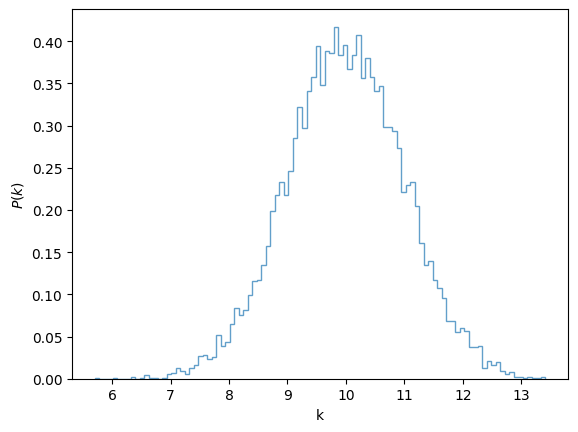

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


a = np.random.randn(10000) + 10
b = np.random.standard_normal(10000)
c = 20.0 * np.random.rand(5000) - 10.0

plt.hist(a, bins=100, density=True, alpha=0.7, histtype='step')
plt.xlabel("k")
plt.ylabel(r"$P(k)$")
plt.show()

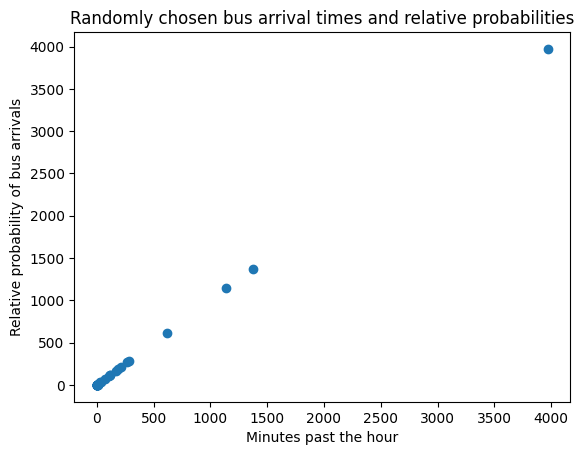

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np

n_buses = 40
bus_times = np.asarray([np.exp((3*random.random())**2) for _ in range(n_buses)])
bus_likelihood = bus_times#+0.1*np.asarray([random.randint(0, 10) for _ in range(n_buses)])

plt.scatter(x=bus_times, y=bus_likelihood)
plt.title("Randomly chosen bus arrival times and relative probabilities")
plt.ylabel("Relative probability of bus arrivals")
plt.xlabel("Minutes past the hour")
plt.show()

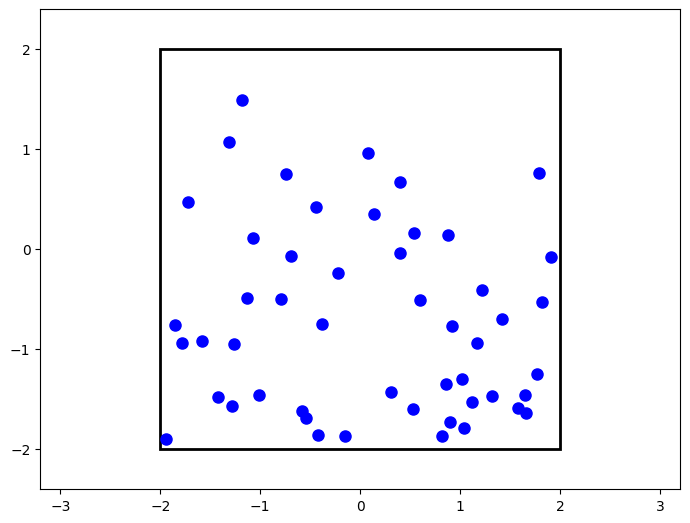

In [ ]:
"""
Animation of Elastic collisions with Gravity

author: Jake Vanderplas
email: vanderplas@astro.washington.edu
website: http://jakevdp.github.com
license: BSD
Please feel free to use and modify this, but keep the above information. Thanks!
"""
import numpy as np
from scipy.spatial.distance import pdist, squareform

import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation

class ParticleBox:
    """Orbits class

    init_state is an [N x 4] array, where N is the number of particles:
       [[x1, y1, vx1, vy1],
        [x2, y2, vx2, vy2],
        ...               ]

    bounds is the size of the box: [xmin, xmax, ymin, ymax]
    """
    def __init__(self,
                 init_state = [[1, 0, 0, -1],
                               [-0.5, 0.5, 0.5, 0.5],
                               [-0.5, -0.5, -0.5, 0.5]],
                 bounds = [-2, 2, -2, 2],
                 size = 0.04,
                 M = 0.05,
                 G = 9.8):
        self.init_state = np.asarray(init_state, dtype=float)
        self.M = M * np.ones(self.init_state.shape[0])
        self.size = size
        self.state = self.init_state.copy()
        self.time_elapsed = 0
        self.bounds = bounds
        self.G = G

    def step(self, dt):
        """step once by dt seconds"""
        self.time_elapsed += dt

        # update positions
        self.state[:, :2] += dt * self.state[:, 2:]

        # find pairs of particles undergoing a collision
        D = squareform(pdist(self.state[:, :2]))
        ind1, ind2 = np.where(D < 2 * self.size)
        unique = (ind1 < ind2)
        ind1 = ind1[unique]
        ind2 = ind2[unique]

        # update velocities of colliding pairs
        for i1, i2 in zip(ind1, ind2):
            # mass
            m1 = self.M[i1]
            m2 = self.M[i2]

            # location vector
            r1 = self.state[i1, :2]
            r2 = self.state[i2, :2]

            # velocity vector
            v1 = self.state[i1, 2:]
            v2 = self.state[i2, 2:]

            # relative location & velocity vectors
            r_rel = r1 - r2
            v_rel = v1 - v2

            # momentum vector of the center of mass
            v_cm = (m1 * v1 + m2 * v2) / (m1 + m2)

            # collisions of spheres reflect v_rel over r_rel
            rr_rel = np.dot(r_rel, r_rel)
            vr_rel = np.dot(v_rel, r_rel)
            v_rel = 2 * r_rel * vr_rel / rr_rel - v_rel

            # assign new velocities
            self.state[i1, 2:] = v_cm + v_rel * m2 / (m1 + m2)
            self.state[i2, 2:] = v_cm - v_rel * m1 / (m1 + m2)

        # check for crossing boundary
        crossed_x1 = (self.state[:, 0] < self.bounds[0] + self.size)
        crossed_x2 = (self.state[:, 0] > self.bounds[1] - self.size)
        crossed_y1 = (self.state[:, 1] < self.bounds[2] + self.size)
        crossed_y2 = (self.state[:, 1] > self.bounds[3] - self.size)

        self.state[crossed_x1, 0] = self.bounds[0] + self.size
        self.state[crossed_x2, 0] = self.bounds[1] - self.size

        self.state[crossed_y1, 1] = self.bounds[2] + self.size
        self.state[crossed_y2, 1] = self.bounds[3] - self.size

        self.state[crossed_x1 | crossed_x2, 2] *= -1
        self.state[crossed_y1 | crossed_y2, 3] *= -1

        # add gravity
        self.state[:, 3] -= self.M * self.G * dt


#------------------------------------------------------------
# set up initial state
np.random.seed(0)
init_state = -0.5 + np.random.random((50, 4))
init_state[:, :2] *= 3.9

box = ParticleBox(init_state, size=0.04)
dt = 1. / 30 # 30fps


#------------------------------------------------------------
# set up figure and animation
fig = plt.figure()
fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
ax = fig.add_subplot(111, aspect='equal', autoscale_on=False,
                     xlim=(-3.2, 3.2), ylim=(-2.4, 2.4))

# particles holds the locations of the particles
particles, = ax.plot([], [], 'bo', ms=6)

# rect is the box edge
rect = plt.Rectangle(box.bounds[::2],
                     box.bounds[1] - box.bounds[0],
                     box.bounds[3] - box.bounds[2],
                     ec='none', lw=2, fc='none')
ax.add_patch(rect)

def init():
    """initialize animation"""
    global box, rect
    particles.set_data([], [])
    rect.set_edgecolor('none')
    return particles, rect

def animate(i):
    """perform animation step"""
    global box, rect, dt, ax, fig
    box.step(dt)

    ms = int(fig.dpi * 2 * box.size * fig.get_figwidth()
             / np.diff(ax.get_xbound())[0])

    # update pieces of the animation
    rect.set_edgecolor('k')
    particles.set_data(box.state[:, 0], box.state[:, 1])
    particles.set_markersize(ms)
    return particles, rect

ani = animation.FuncAnimation(fig, animate, frames=100,
                              interval=10, blit=True, init_func=init)
HTML(ani.to_jshtml())

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
#ani.save('particle_box.mp4', fps=30, extra_args=['-vcodec', 'libx264'])



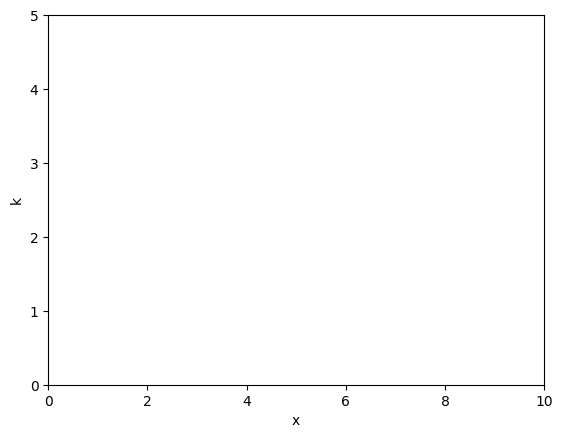

In [ ]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation

tau=0.2
x0=0.1
fig=plt.figure()
ax=plt.axes(xlim=(0,10),ylim=(0,5))
line, =ax.plot([],[],lw=2)
ax.set_xlabel('x')
ax.set_ylabel(r'k')

def init():
  line.set_data([],[])
  return line,

def animate(i):
  y=np.array([1,2,3,4,5])#np.sin(2*np.pi*(x-0.01*i))+np.sin(2*np.pi*(2*x-0.04*i))
  x=[1,1,1,1,1]+y*(np.sqrt((0.1*i+tau)**2+1)-np.sqrt(tau**2+1))
  line.set_data(x,y)
  return line,
anim=FuncAnimation(fig, animate, init_func=init,
                   frames=100,interval=100, blit=True)
anim.save('basic_animation.mp4',fps=30,extra_args=['-vcodec','libx264'])

HTML(anim.to_jshtml())

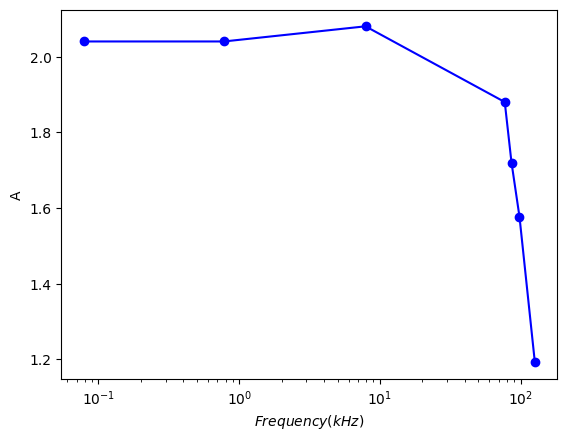

In [16]:
import numpy as np
import matplotlib.pyplot as plt

x=[0.079,
0.7796
,7.9
,77
,86
,98
,126

]
y=np.array([2.04
,2.04
,2.08
,1.88
,1.72
,1.576923077
,1.192307692



])
ax=plt.gca()
plt.xscale('log')
ax.plot(x,y,'-bo')
#ax3.scatter(x,2*y**2-1,color='r')
ax.set_xlabel(r"$Frequency(kHz)$")
ax.set_ylabel("A")
plt.savefig('img6.png')

In [ ]:
np.array([1,
          2])*2

array([2, 4])